<a href="https://colab.research.google.com/github/sugimochi97/notify_prime_number/blob/master/MLP_%E7%B7%B4%E7%BF%92%E7%94%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLPを使ってMNISTの分類モデルを作る
- 手書き数字のMNISTと、Fashion MNISTのデータを使用

## 必要ライブラリのインポート

In [ ]:
import torch
import torch.nn as nn
import torch.optim as opt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## MLPのクラスを定義

In [ ]:
IN_FEATURES = 28*28
OUTPUTCLASSES = 10

class MLP(nn.Module):
    def __init__(self, in_features=IN_FEATURES, output_classes=OUTPUT_CLASSES):
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Linear(in_features, 400),
            nn.ReLU(inplace=True),
            nn.Linear(400, 200),
            nn.ReLU(inplace=True),
            nn.Linear(200, 100),
            nn.ReLU(inplace=True),
            nn.Linear(100, output_classes)
        )

    def forward(self, x):
        output = self.classifier(x)
        return output

## CPU or GPUの判定

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## まずは数字の手書き文字データから

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
num_batches = 100
train_dataloader = DataLoader(train_dataset, batch_size=num_batches, shuffle=True)

### 学習させる

In [ ]:
model = MLP()
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = opt.Adam(model.parameters(), lr=0.01)

In [ ]:
num_epochs = 15
losses = []
accs = []
for epoch in range(num_epochs):
    running_loss = 0.0
    running_acc = 0.0


In [ ]:
num_epochs = 15
losses = []
accs = []
for epoch in range(num_epochs):
    running_loss = 0.0
    running_acc = 0.0
    for imgs, labels in train_dataloader:
        imgs = imgs.view(num_batches, -1)
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model(imgs)
        loss = criterion(output, labels)
        running_loss += loss.item()
        pred = torch.argmax(output, dim=1)
        running_acc += torch.mean(pred.eq(labels).float())
        loss.backward()
        optimizer.step()
    running_loss /= len(train_dataloader)
    running_acc /= len(train_dataloader)
    losses.append(running_loss)
    accs.append(running_acc)
    print(f'epoch: {epoch}, loss: {running_loss}, acc: {running_acc}')

epoch: 0, loss: 0.26857740063841146, acc: 0.921934962272644
epoch: 1, loss: 0.14210688365235305, acc: 0.9606338739395142
epoch: 2, loss: 0.12952911257045344, acc: 0.9650665521621704
epoch: 3, loss: 0.11537827855713355, acc: 0.9704827070236206
epoch: 4, loss: 0.09963145899256536, acc: 0.9748493432998657
epoch: 5, loss: 0.09445045851442653, acc: 0.9758156538009644
epoch: 6, loss: 0.08467551210856375, acc: 0.9786497354507446
epoch: 7, loss: 0.07992710709571839, acc: 0.9794491529464722
epoch: 8, loss: 0.08068848267983413, acc: 0.979299008846283
epoch: 9, loss: 0.0831517585075926, acc: 0.9800990223884583
epoch: 10, loss: 0.06863513084982212, acc: 0.9831653833389282
epoch: 11, loss: 0.059692795336110674, acc: 0.9858819842338562
epoch: 12, loss: 0.059868118351247786, acc: 0.9852156639099121
epoch: 13, loss: 0.07420589985369588, acc: 0.983032763004303
epoch: 14, loss: 0.07251862720300171, acc: 0.9834158420562744


### 結果表示

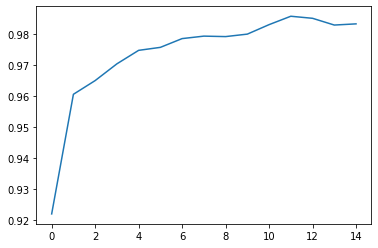

In [ ]:
plt.plot(accs)

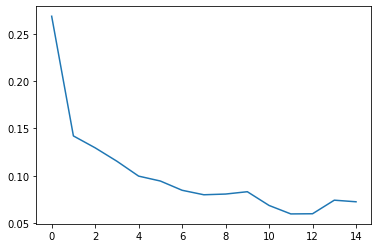

In [ ]:
plt.plot(losses)

In [ ]:
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_dataloader = DataLoader(test_dataset, batch_size=num_batches, shuffle=False)
imgs, labels = iter(test_dataloader).next()

In [ ]:
imgs = imgs.view(100, -1).to(device)
pred = torch.argmax(model(imgs).to('cpu'), dim=1)
imgs = imgs.to('cpu')
lbels = labels.to('cpu')

In [ ]:
labels_map = {}
for i in range(len(labels)):
    labels_map[i] = str(i)

In [ ]:
def plot_classified(imgs, pred, labels, labels_map, num_batches, num_rows=10, has_savefig=False, savefig_path='./Untitled.png'):
    plt.figure(figsize=(num_rows*2.5, (num_batches//num_rows)*3.5))
    for i in range(num_batches):
        img = imgs[i].view(28,28,1).numpy()[:,:,0]
        plt.subplot(num_batches//num_rows+1, num_rows, i+1)
        if pred[i] == labels[i]:
            plt.title(labels_map[int(pred[i])], color='blue')
        else:
            plt.title(labels_map[int(pred[i])], color='red')
        plt.tight_layout()
        plt.imshow(img, cmap='gray')
    if has_savefig:
        plt.savefig(savefig_path)

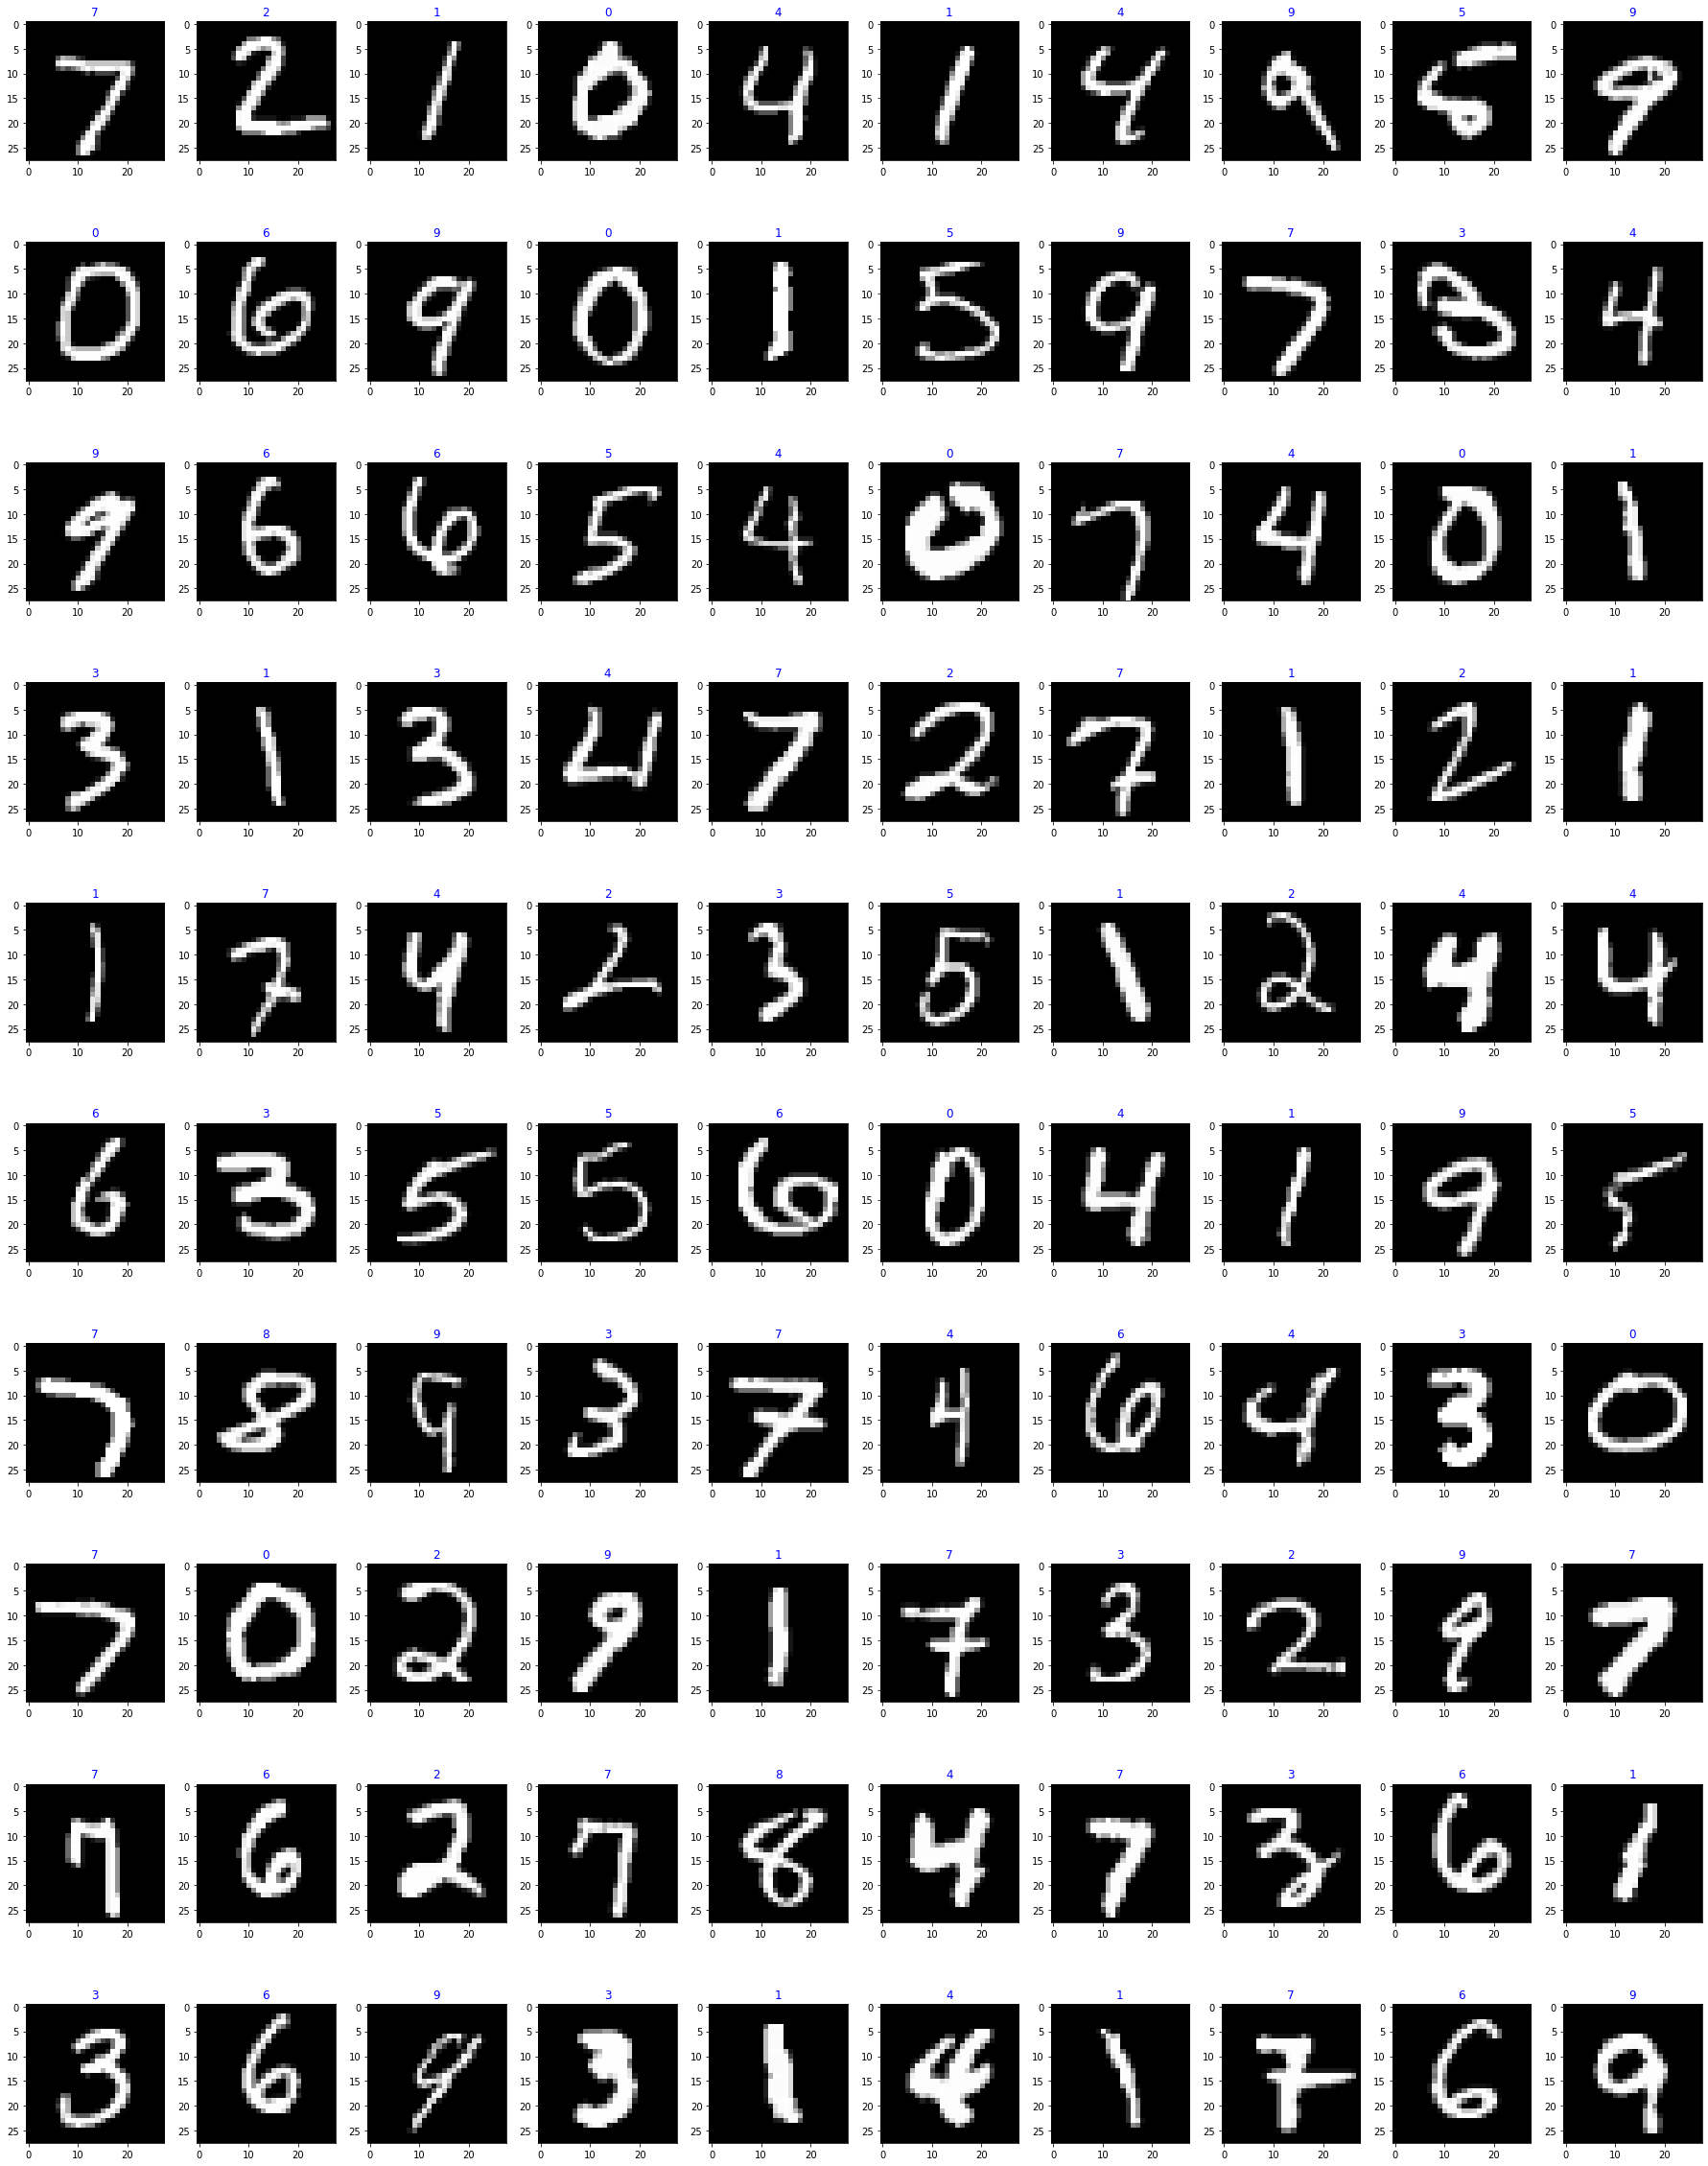

In [ ]:
plot_classified(imgs, pred, labels, labels_map, num_batches)

## FashionMNISTを使った分類

### データを用意

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor()
])
training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = transform
)
test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = False,
    transform = transform
)

In [ ]:
num_batches = 100
train_dataloader = DataLoader(training_data, batch_size=num_batches, shuffle=True)

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

### 学習させる

In [ ]:
model = MLP()
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [ ]:
num_epochs = 15
losses = []
accs = []
for epoch in range(num_epochs):
    running_loss = 0.0
    running_acc = 0.0
    for imgs, labels in train_dataloader:
        imgs = imgs.view(num_batches, -1)
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model(imgs)
        loss = criterion(output, labels)
        running_loss += loss.item()
        pred = torch.argmax(output, dim=1)
        running_acc += torch.mean(pred.eq(labels).float())
        loss.backward()
        optimizer.step()
    running_loss /= len(train_dataloader)
    running_acc /= len(train_dataloader)
    losses.append(running_loss)
    accs.append(running_acc)
    print(f'epoch: {epoch}, loss: {running_loss}, acc: {running_acc}')

epoch: 0, loss: 0.5487581602483987, acc: 0.7979158163070679
epoch: 1, loss: 0.4133819914112488, acc: 0.8519667983055115
epoch: 2, loss: 0.3834266501789292, acc: 0.8637327551841736
epoch: 3, loss: 0.3656819152335326, acc: 0.8682829141616821
epoch: 4, loss: 0.3634737951556842, acc: 0.8721840381622314
epoch: 5, loss: 0.3478077589472135, acc: 0.8752672672271729
epoch: 6, loss: 0.3340620552003384, acc: 0.8796501159667969
epoch: 7, loss: 0.32555850215256216, acc: 0.8834167718887329
epoch: 8, loss: 0.33123571251829464, acc: 0.8820829391479492
epoch: 9, loss: 0.3253647817422946, acc: 0.8846835494041443
epoch: 10, loss: 0.3132197913279136, acc: 0.88740074634552
epoch: 11, loss: 0.3226099959760904, acc: 0.886200487613678
epoch: 12, loss: 0.30645316841701664, acc: 0.8894339203834534
epoch: 13, loss: 0.31039278458803893, acc: 0.8885504603385925
epoch: 14, loss: 0.3079910537724694, acc: 0.8909844160079956


In [ ]:
test_dataloader = DataLoader(test_data, batch_size=num_batches, shuffle=False)
test_iter = iter(test_dataloader)
imgs, labels = test_iter.next()
imgs = imgs.view(100, -1)
pred = torch.argmax(model(imgs.to(device)), dim=1).to('cpu')

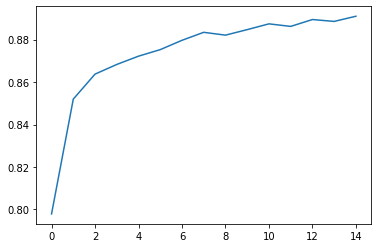

In [ ]:
plt.plot(accs)

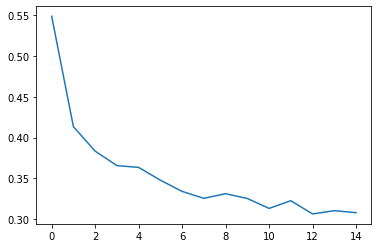

In [ ]:
plt.plot(losses)

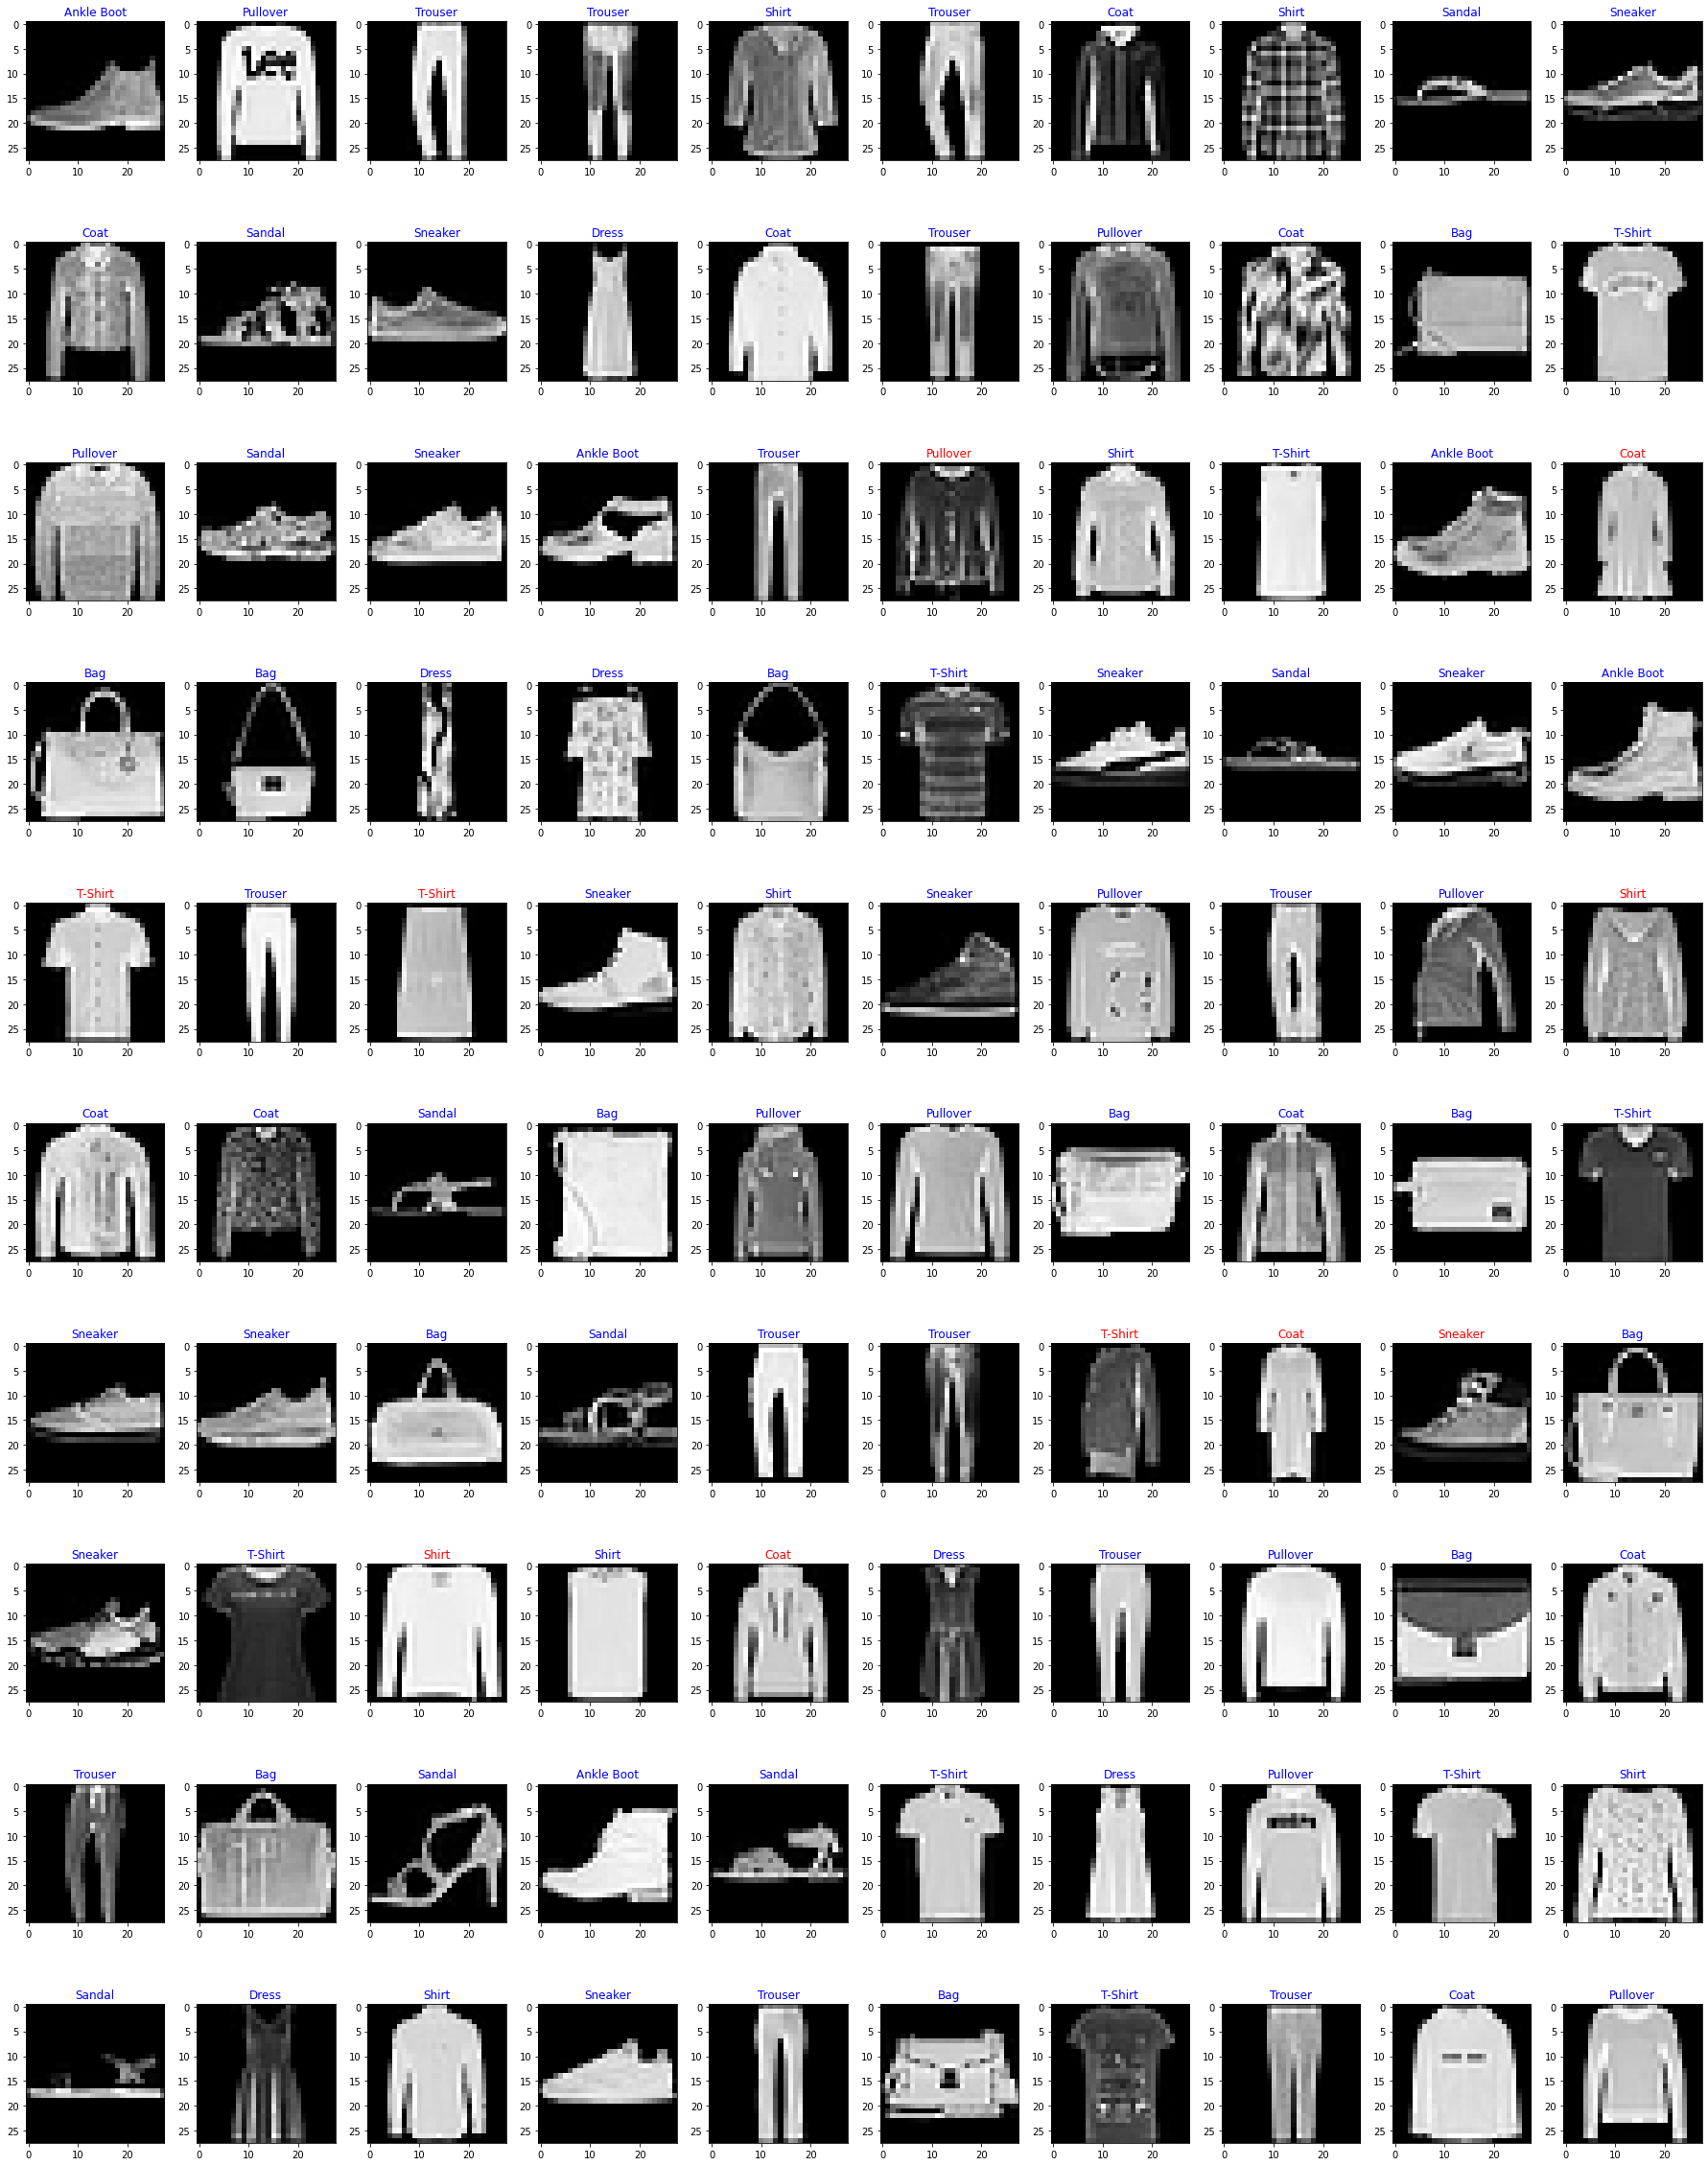

In [ ]:
plot_classified(imgs, pred, labels, labels_map, num_batches)

In [ ]:
import termios

In [ ]:
import msvcrt

ModuleNotFoundError: ignored

In [ ]:
import tty